In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
plt.style.use('ggplot')

In [2]:
names = ['AEP','COMED','DAYTON','DEOK','DOM','DUQ','EKPC',
         'est_pjm','FE','NI','PJM_Load','PJME','PJMW']
files = []
for name in names:
    temp = pd.read_csv('hourly-energy-consumption/' + name + '_' + 'hourly.csv')
    temp = temp.sort_values(by='Datetime')
    files.append(temp)

In [3]:
for i in range(len(files)):
    files[i].Datetime = pd.to_datetime(files[i].Datetime)
    files[i]['Date'] = files[i].Datetime.apply(lambda x: x.date())
    files[i]['Year'] = files[i].Datetime.apply(lambda x: x.year)
    files[i]['Quarter'] = files[i].Datetime.apply(lambda x: x.quarter)
    files[i]['Month'] = files[i].Datetime.apply(lambda x: x.month)
    files[i]['Week'] = files[i].Datetime.apply(lambda x: x.weekofyear)
    files[i]['DayofYear'] = files[i].Datetime.apply(lambda x: x.dayofyear)
    files[i]['DayofMonth'] = files[i].Datetime.apply(lambda x: x.day)
    files[i]['DayofWeek'] = files[i].Datetime.apply(lambda x: x.weekday()+1)
    files[i]['Hour'] = files[i].Datetime.apply(lambda x: x.hour)

In [4]:
files[0].head()

,Datetime,AEP_MW,Date,Year,Quarter,Month,Week,DayofYear,DayofMonth,DayofWeek,Hour
2183,2004-10-01 01:00:00,12379.0,2004-10-01,2004,4,10,40,275,1,5,1
2184,2004-10-01 02:00:00,11935.0,2004-10-01,2004,4,10,40,275,1,5,2
2185,2004-10-01 03:00:00,11692.0,2004-10-01,2004,4,10,40,275,1,5,3
2186,2004-10-01 04:00:00,11597.0,2004-10-01,2004,4,10,40,275,1,5,4
2187,2004-10-01 05:00:00,11681.0,2004-10-01,2004,4,10,40,275,1,5,5


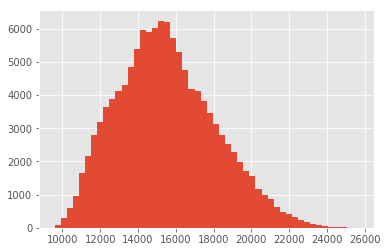

In [5]:
files[0].AEP_MW.hist(bins=50)

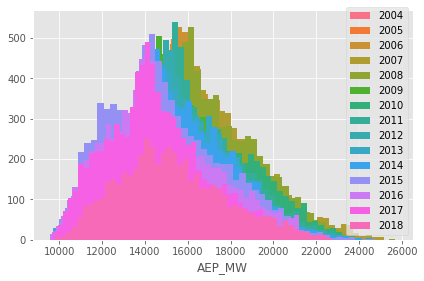

In [6]:
c = sns.FacetGrid(files[0],hue = 'Year',height = 4, aspect = 1.5)
c.map(plt.hist,'AEP_MW',bins=50)
plt.legend()

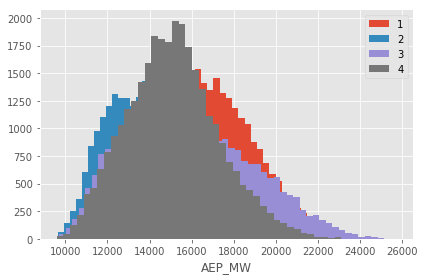

In [7]:
c = sns.FacetGrid(files[0],hue = 'Quarter',height = 4, aspect = 1.5)
c.map(plt.hist,'AEP_MW',bins=50)
plt.legend()

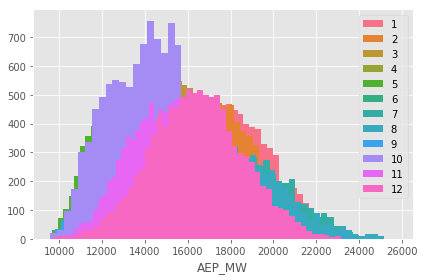

In [8]:
c = sns.FacetGrid(files[0],hue = 'Month',height = 4, aspect = 1.5)
c.map(plt.hist,'AEP_MW',bins=50)
plt.legend()

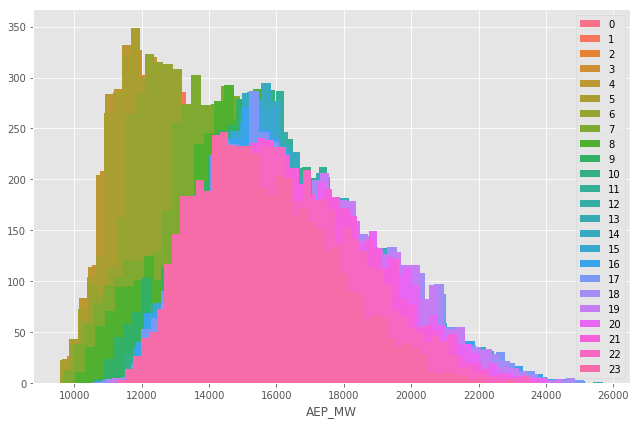

In [9]:
c = sns.FacetGrid(files[0],hue = 'Hour',height = 6, aspect = 1.5)
c.map(plt.hist,'AEP_MW',bins=50)
plt.legend()

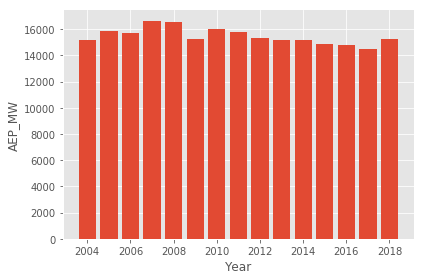

In [10]:
yearAve = files[0].groupby(['Year']).agg({'AEP_MW':'mean'}).reset_index()
y = sns.FacetGrid(yearAve,height=4,aspect=1.5)
y.map(plt.bar,'Year','AEP_MW')

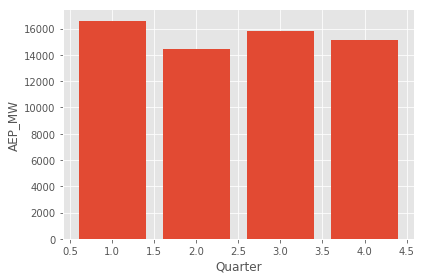

In [11]:
yearAve = files[0].groupby(['Quarter']).agg({'AEP_MW':'mean'}).reset_index()
y = sns.FacetGrid(yearAve,height=4,aspect=1.5)
y.map(plt.bar,'Quarter','AEP_MW')

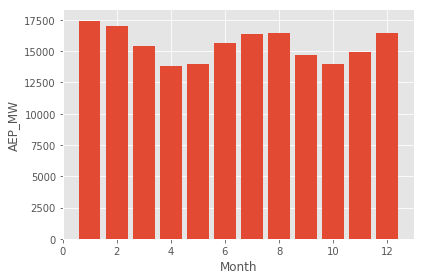

In [12]:
yearAve = files[0].groupby(['Month']).agg({'AEP_MW':'mean'}).reset_index()
y = sns.FacetGrid(yearAve,height=4,aspect=1.5)
y.map(plt.bar,'Month','AEP_MW')

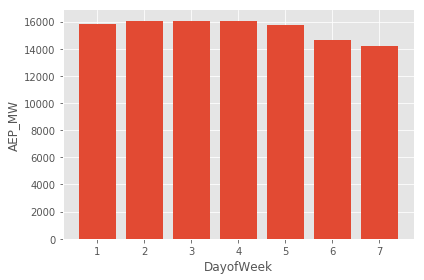

In [13]:
yearAve = files[0].groupby(['DayofWeek']).agg({'AEP_MW':'mean'}).reset_index()
y = sns.FacetGrid(yearAve,height=4,aspect=1.5)
y.map(plt.bar,'DayofWeek','AEP_MW')

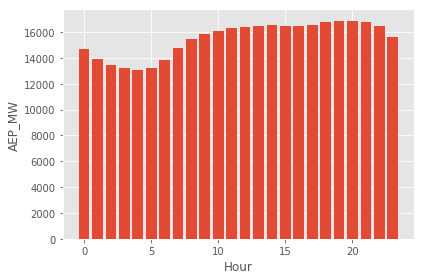

In [14]:
yearAve = files[0].groupby(['Hour']).agg({'AEP_MW':'mean'}).reset_index()
y = sns.FacetGrid(yearAve,height=4,aspect=1.5)
y.map(plt.bar,'Hour','AEP_MW')

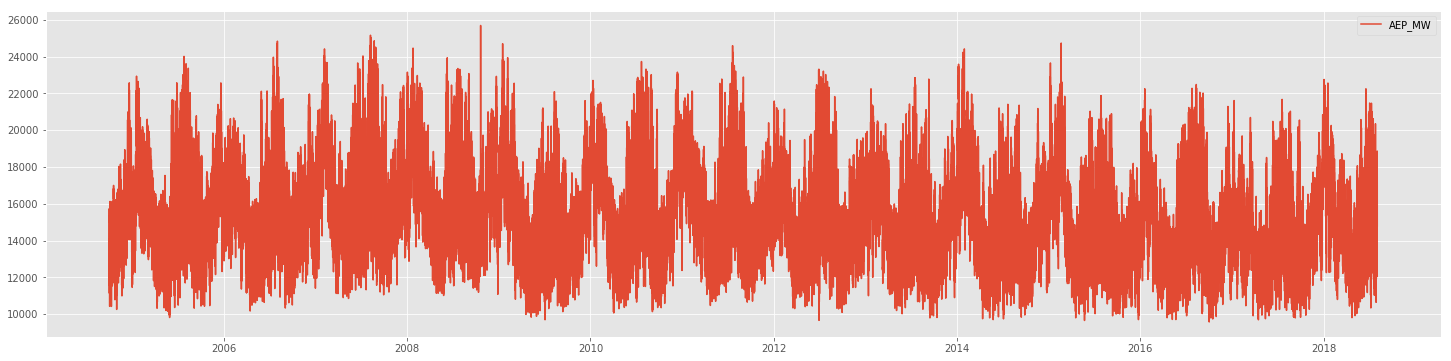

In [15]:
figure(figsize=(25,6))
plt.plot(files[0].Datetime,files[0].AEP_MW)
plt.legend()
display()

In [16]:
files[0].head()

,Datetime,AEP_MW,Date,Year,Quarter,Month,Week,DayofYear,DayofMonth,DayofWeek,Hour
2183,2004-10-01 01:00:00,12379.0,2004-10-01,2004,4,10,40,275,1,5,1
2184,2004-10-01 02:00:00,11935.0,2004-10-01,2004,4,10,40,275,1,5,2
2185,2004-10-01 03:00:00,11692.0,2004-10-01,2004,4,10,40,275,1,5,3
2186,2004-10-01 04:00:00,11597.0,2004-10-01,2004,4,10,40,275,1,5,4
2187,2004-10-01 05:00:00,11681.0,2004-10-01,2004,4,10,40,275,1,5,5


### Use direct xgboost

In [17]:
# !pip install xgboost
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import mean_squared_error

In [18]:
aep_train = files[0][files[0]['Year']<=2016]
aep_test = files[0][files[0]['Year']>2016]
aep_train_x = aep_train[['Year','Quarter','Month','Week','DayofYear','DayofMonth','DayofWeek','Hour']]
aep_train_y = aep_train[['AEP_MW']]
aep_test_x = aep_test[['Year','Quarter','Month','Week','DayofYear','DayofMonth','DayofWeek','Hour']]
aep_test_y = aep_test[['AEP_MW']]

In [35]:
xg_reg = xgb.XGBRegressor(objective='reg:squarederror')

In [36]:
xg_reg.fit(aep_train_x,aep_train_y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:squarederror',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=1, verbosity=1)

In [37]:
preds = xg_reg.predict(aep_test_x)

In [38]:
rmse = np.sqrt(mean_squared_error(aep_test_y, preds))
print("RMSE: %f" % (rmse))

RMSE: 1633.012352


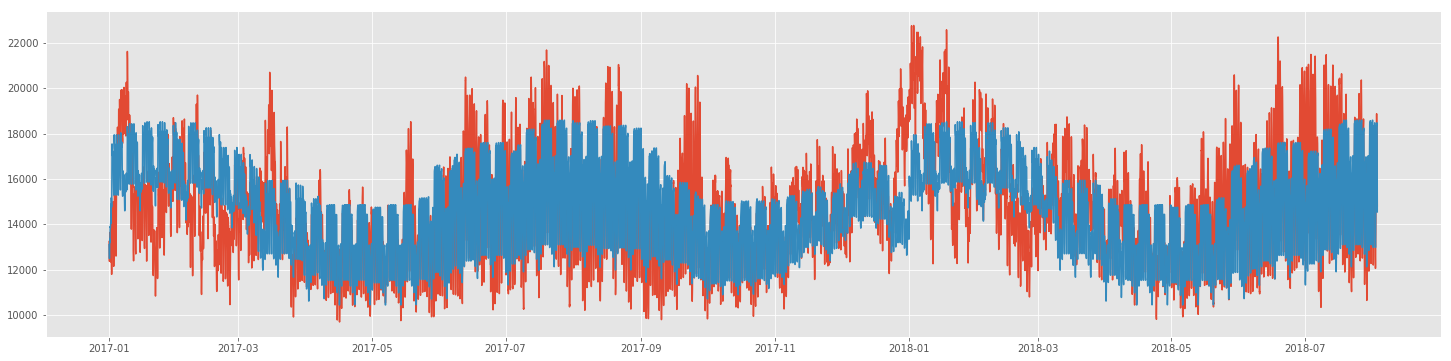

In [39]:
figure(figsize=(25,6))
plt.plot(files[0][files[0]['Year']>2016].Datetime,aep_test_y)
plt.plot(files[0][files[0]['Year']>2016].Datetime,preds)

In [40]:
# xg_reg.feature_importances_

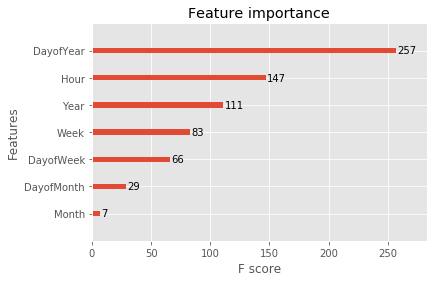

In [41]:
plot_importance(xg_reg)

### Use XGBRegressor

In [26]:
from xgboost import XGBRegressor

In [42]:
xgb_r = XGBRegressor(objective='reg:squarederror')
xgb_r.fit(aep_train_x,aep_train_y)
pred = xgb_r.predict(aep_test_x)

In [43]:
rmse = np.sqrt(mean_squared_error(aep_test_y, pred))
print("RMSE: %f" % (rmse))

RMSE: 1633.012352


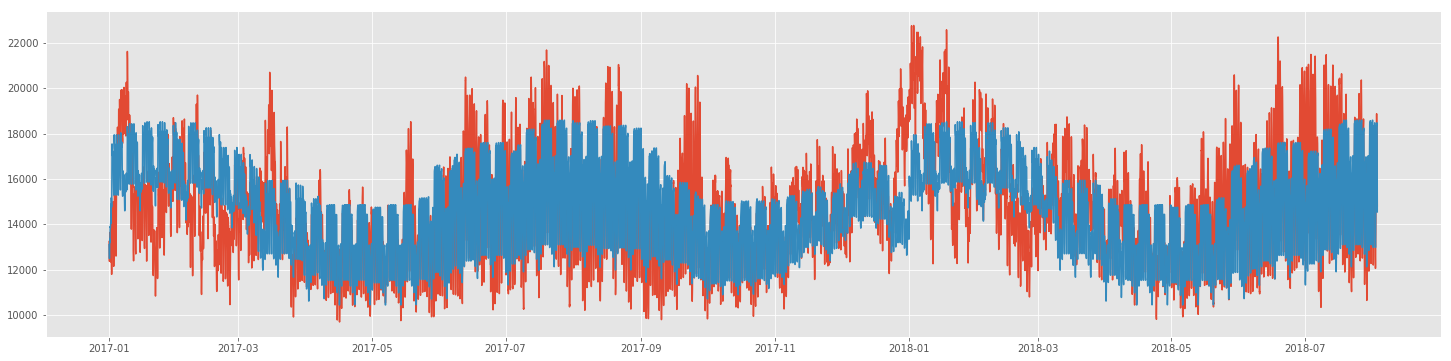

In [44]:
figure(figsize=(25,6))
plt.plot(files[0][files[0]['Year']>2016].Datetime,aep_test_y)
plt.plot(files[0][files[0]['Year']>2016].Datetime,pred)

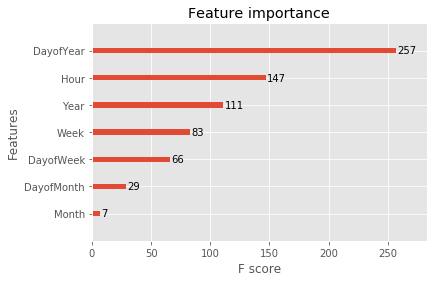

In [45]:
plot_importance(xgb_r)

### Tuning hyperparameters by grid search

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

In [47]:
max_depth = [3,4,5]
learning_rate = [i/10 for i in np.linspace(1,10,10)]
n_estimator = [50,100,200]
# gamma = [i/10 for i in range(6)]
reg_alpha = [i/10 for i in range(10)]
hyperP = dict(max_depth=max_depth,learning_rate=learning_rate,n_estimator=n_estimator,reg_alpha=reg_alpha)

In [48]:
xgb = XGBRegressor(objective='reg:squarederror')
grid = GridSearchCV(xgb,hyperP,cv=3)
grid.fit(aep_train_x,aep_train_y)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:squarederror',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=None, subsample=1, verbosity=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [3, 4, 5], 'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'n_estimator': [50, 100, 200], 'reg_alpha': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [49]:
print(r2_score(aep_test_y,grid.best_estimator_.predict(aep_test_x)))

0.5385507135809695


In [53]:
print(mean_squared_error(aep_test_y,grid.best_estimator_.predict(aep_test_x)))

2666729.192860607


In [50]:
pred_best = grid.best_estimator_.predict(aep_test_x)

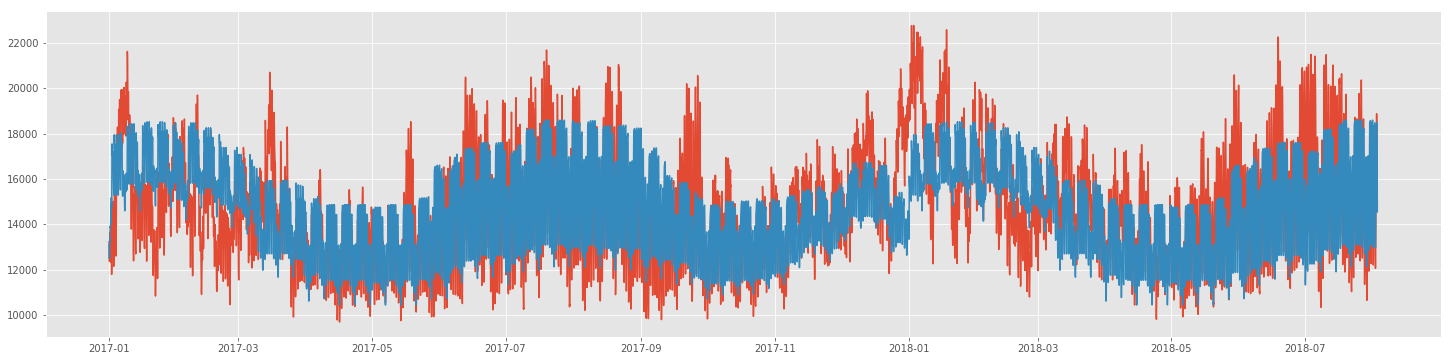

In [51]:
figure(figsize=(25,6))
plt.plot(files[0][files[0]['Year']>2016].Datetime,aep_test_y)
plt.plot(files[0][files[0]['Year']>2016].Datetime,pred_best)

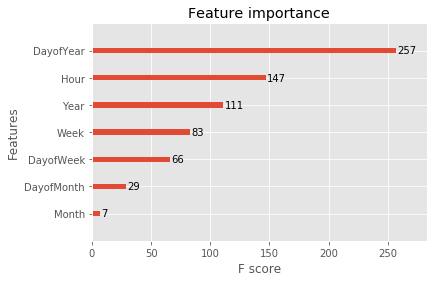

In [56]:
plot_importance(grid.best_estimator_)